# Explore here

Problem: 
Predicting the cost of health insurance for a person
The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

age. Age of primary beneficiary (numeric)
sex. Gender of the primary beneficiary (categorical)
bmi. Body mass index (numeric)
children. Number of children/dependents covered by health insurance (numeric)
smoker. Is the person a smoker? (categorical)
region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
charges. Health insurance premium (numerical)






In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [15]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data_raw.head(200)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
195,19,male,30.590,0,no,northwest,1639.56310
196,39,female,32.800,0,no,southwest,5649.71500
197,45,female,28.600,2,no,southeast,8516.82900
198,51,female,18.050,0,no,northwest,9644.25250


Guardamos nuestros datos en el folder de data raw.

In [16]:
path = rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Linear_regression-main\data\raw\raw_data.csv"

data_raw.to_csv(path, index=False)

Observamos el panorama de nuestro data set para identificar la forma, los tipos de datos, etc.


In [17]:
print(data_raw.info())
print(data_raw.shape)
print(data_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

Podemos ver un dataset pequenio, con 7 columnas, tres categoricas y el resto numericas, hasta el momento no se tiene ningun indicio de valores nulos, pero se hara analisis mas a detalle adeltante, el aproach va a ser analizar cada variable individualmente, para despues analiazarlas en pareja y su relacion con la variable objetivo que en este caso sera "charges"

In [18]:

def categorical_plots(df):
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_vars:
        value_counts = df[col].value_counts()
        plt.figure(figsize=(10, 6))
        plt.barh(value_counts.index, value_counts.values, color='skyblue')
        plt.title(f'Distribución de {col}')
        plt.xlabel('Conteo')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


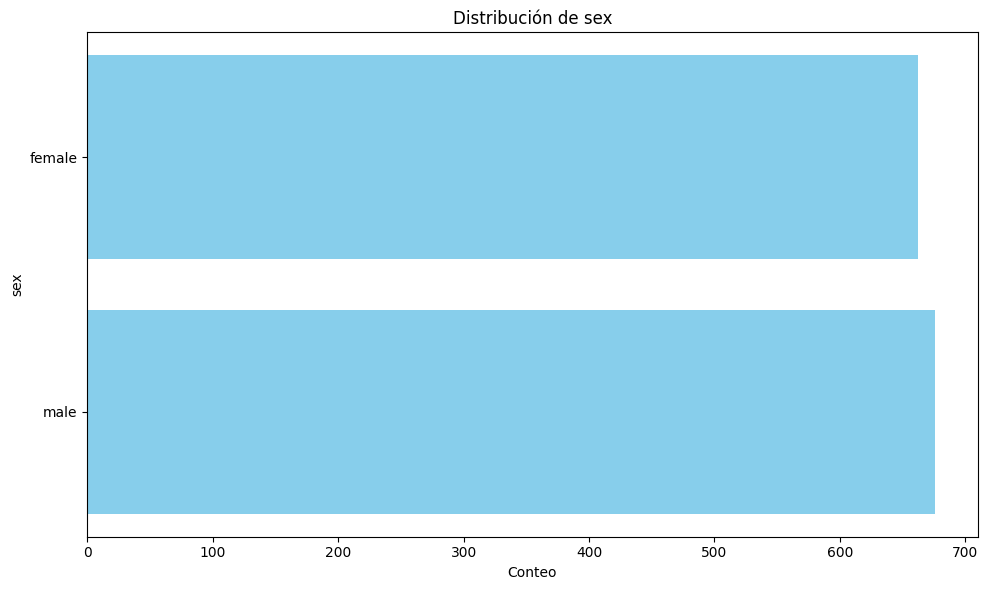

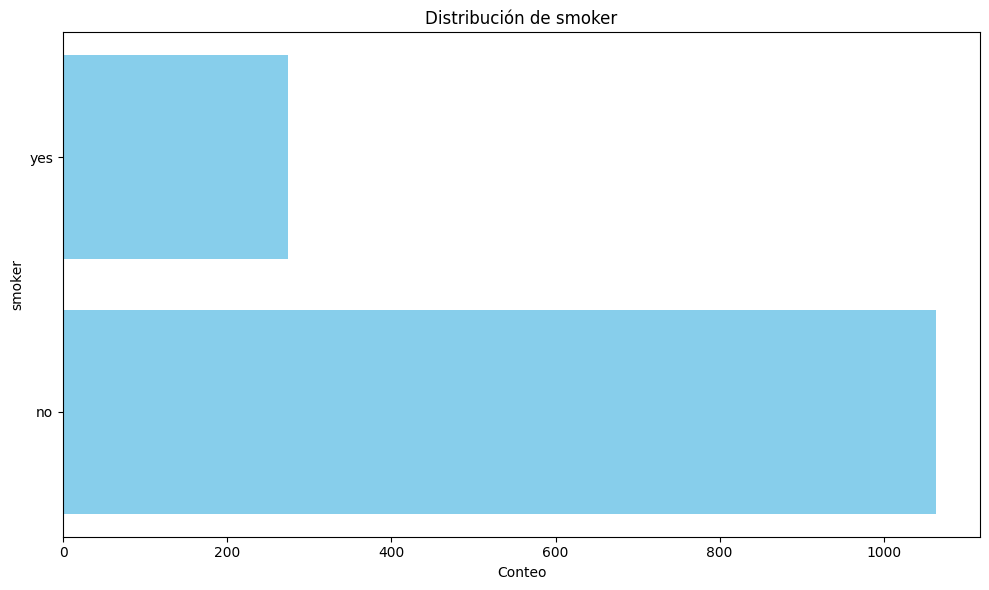

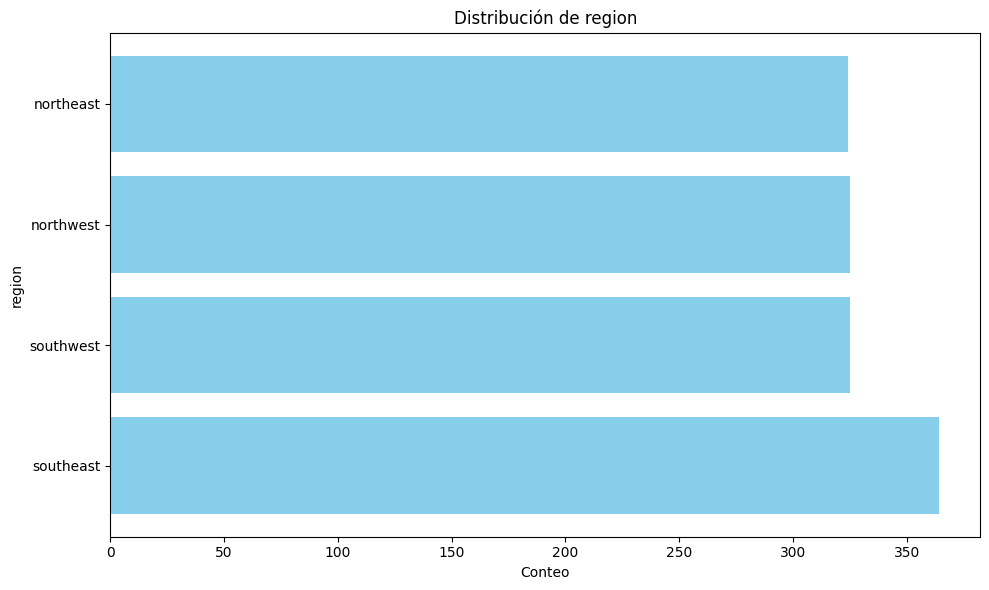

In [19]:

categorical_plots(data_raw)

In [20]:
def numerical_cats(df):
    numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_vars:
        plt.figure(figsize=(10, 6))
        df[col].hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

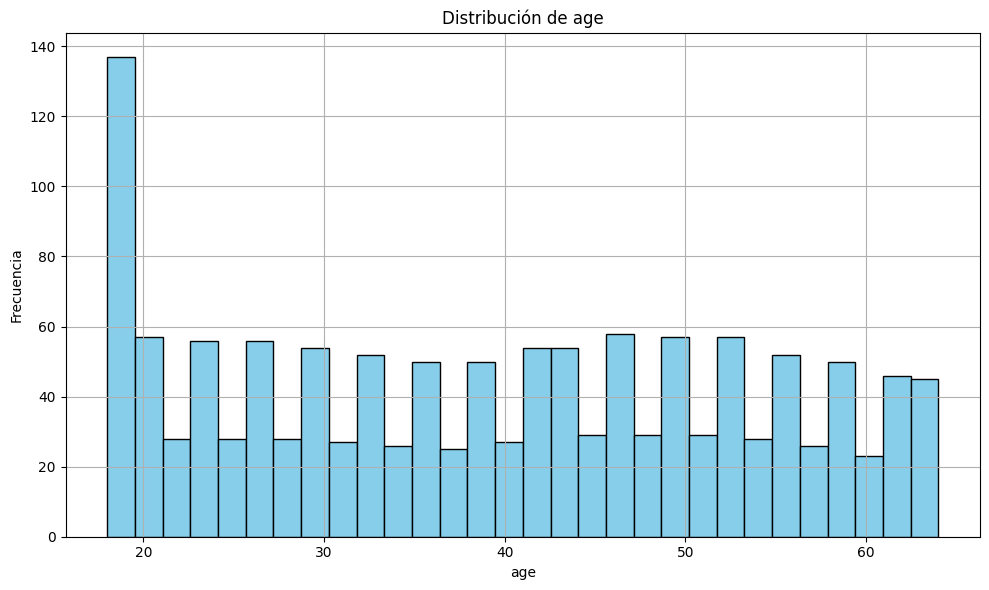

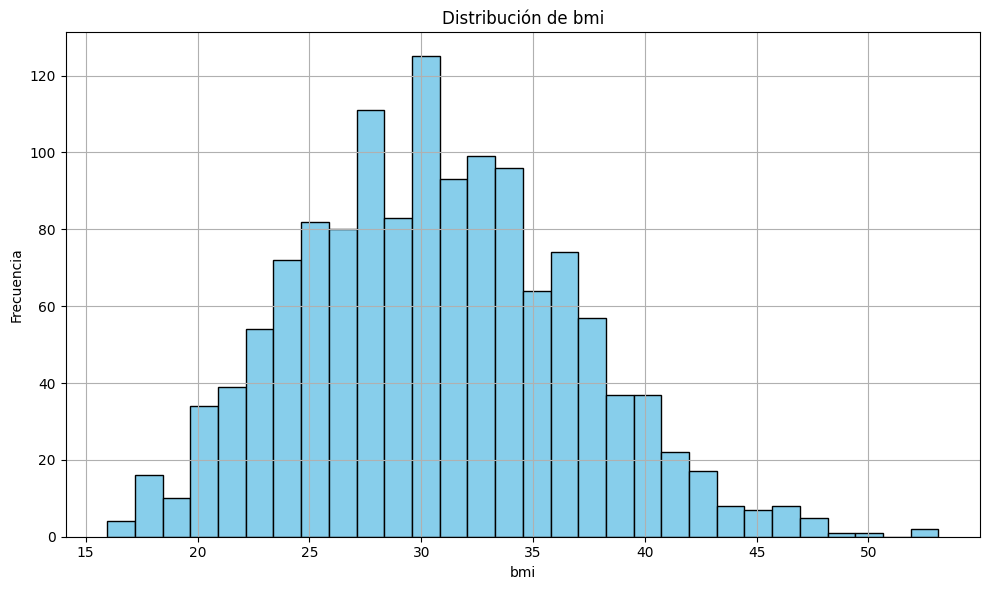

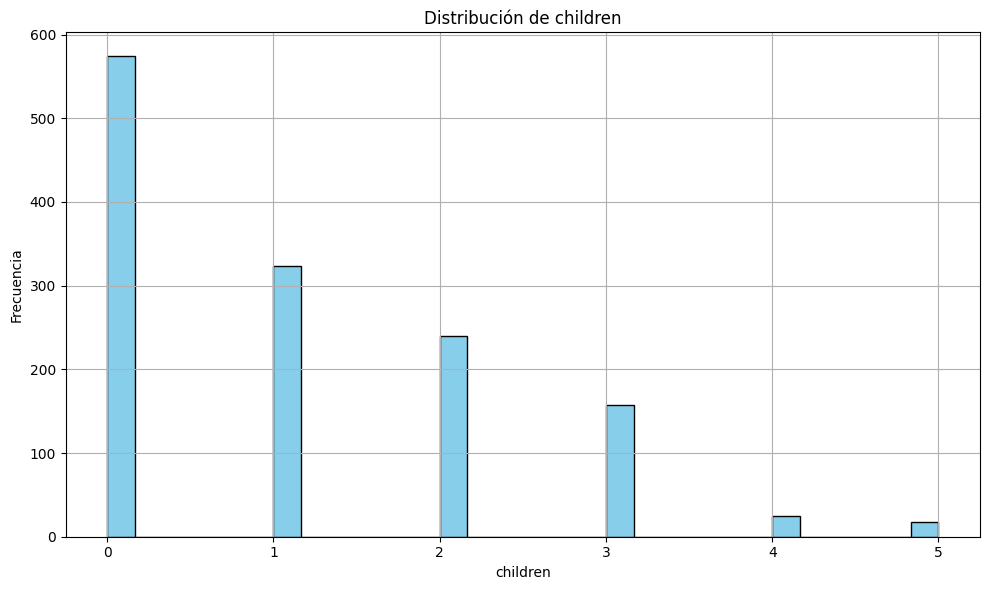

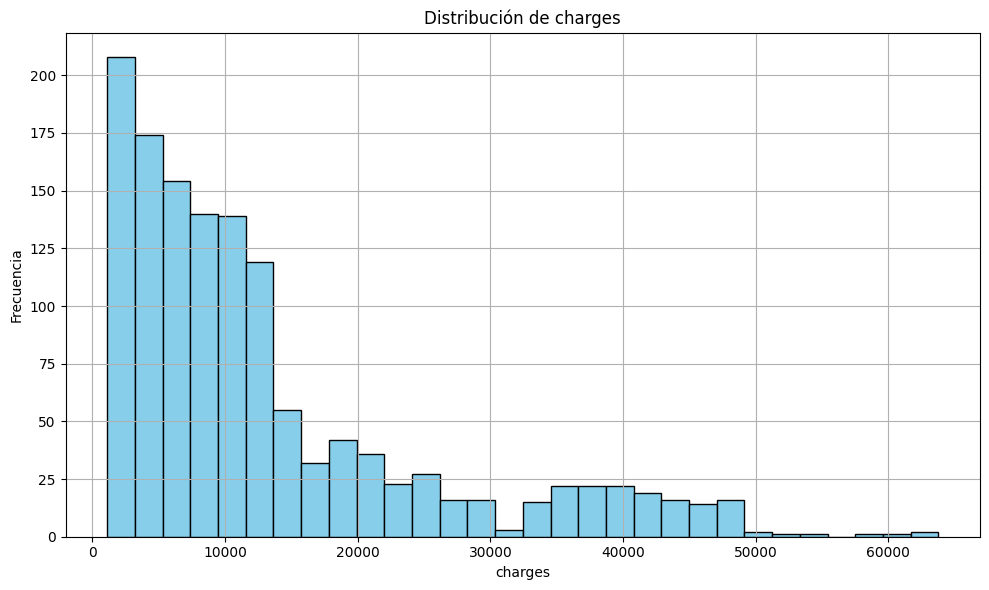

In [21]:
numerical_cats(data_raw)

In [22]:
def objetivo_vs_numericas(df, target):
    numeric_vars = df.select_dtypes(include=['int64', 'float64', 'int8']).columns
    
    for col in numeric_vars:
        if col != target:
            plt.figure(figsize=(7,5))
            plt.scatter(df[col], df[target], alpha=0.5)
            plt.title(f'{target} vs {col}')
            plt.xlabel(col)
            plt.ylabel(target)
            plt.tight_layout()
            plt.show()

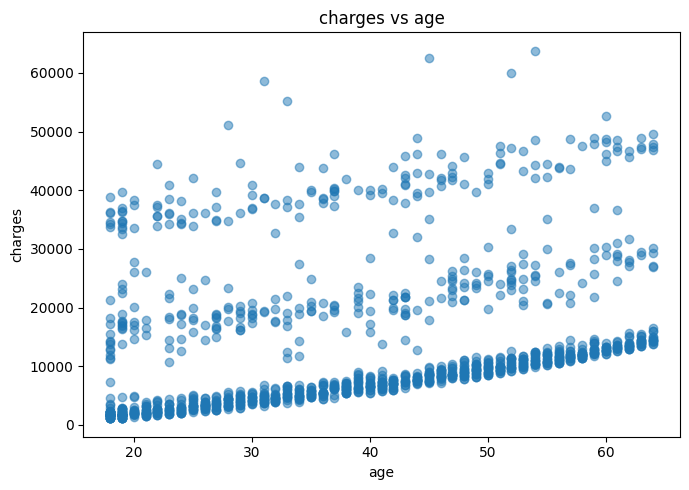

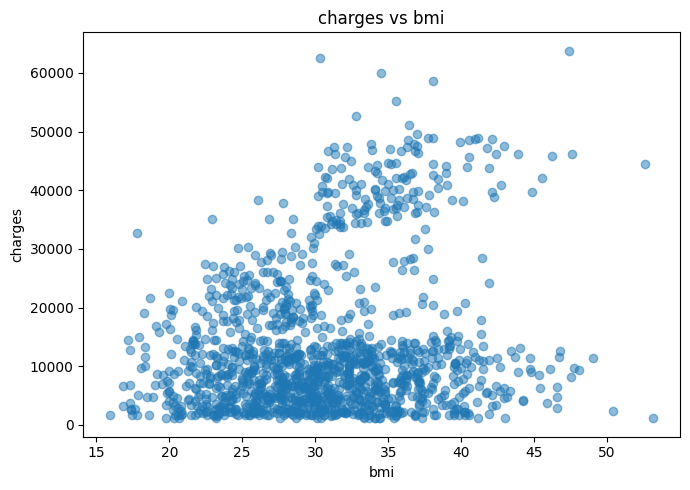

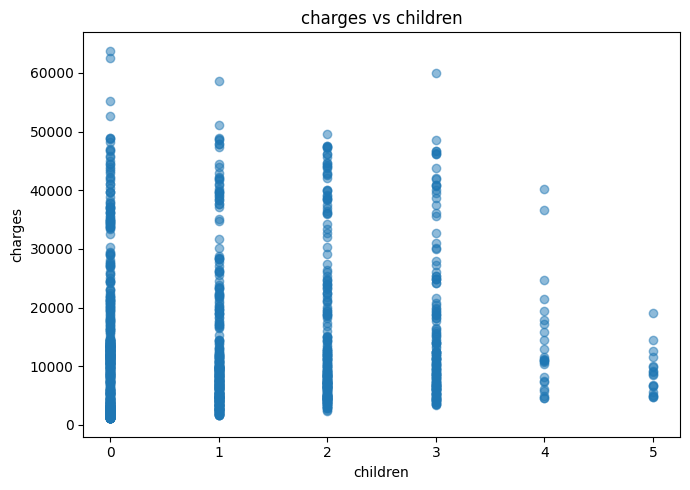

In [23]:

objetivo_vs_numericas(data_raw, 'charges')

In [24]:
def categoricas_vs_objetivo(df, target):
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_vars:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()


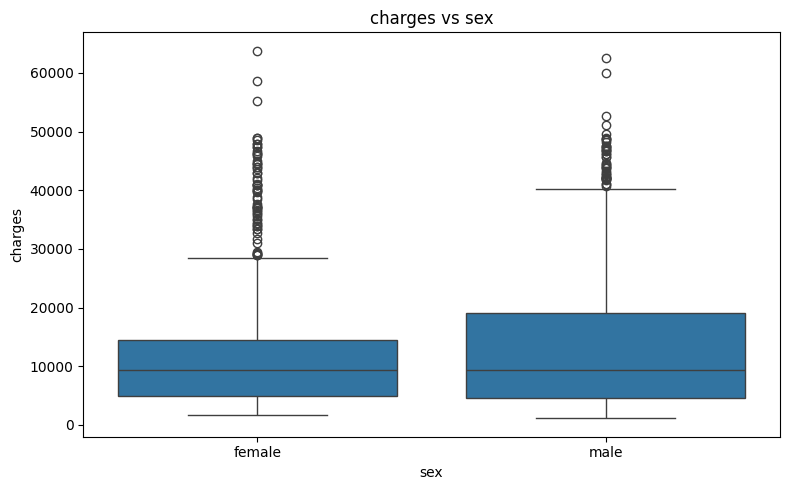

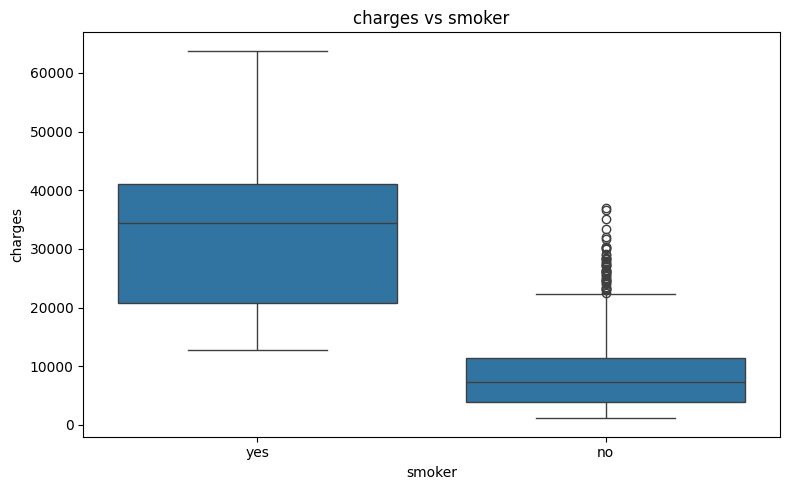

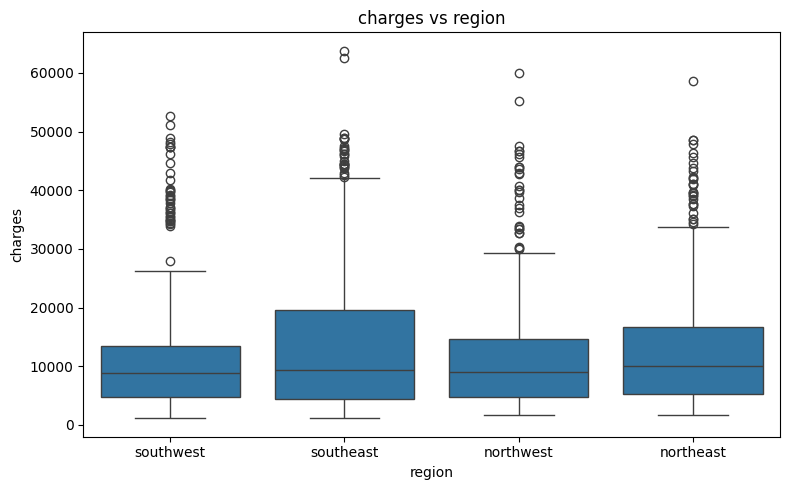

In [25]:
categoricas_vs_objetivo(data_raw, 'charges')

In [26]:
def ordinal_encoding(df, categorical_columns):
    df_encoded = df.copy()
    for col in categorical_columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded


In [27]:
categorical_columns = ['sex', 'smoker', 'region']
data_encoded = ordinal_encoding(data_raw, categorical_columns)

data_encoded.head(3)

con ello podemos analizar mejor el efecto de cada variable en la variable objeetivo

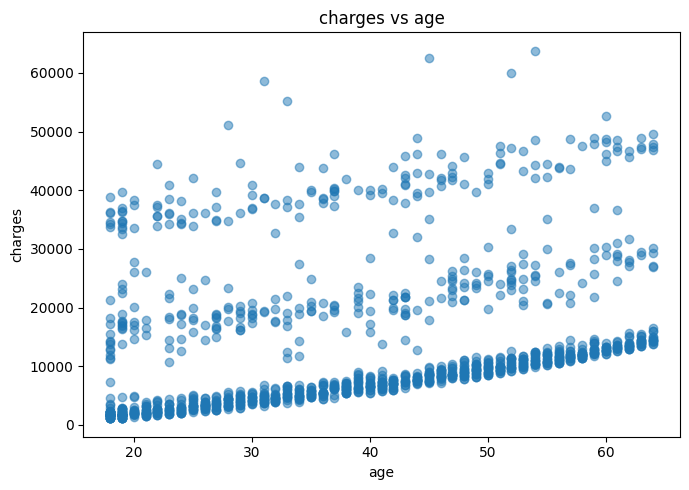

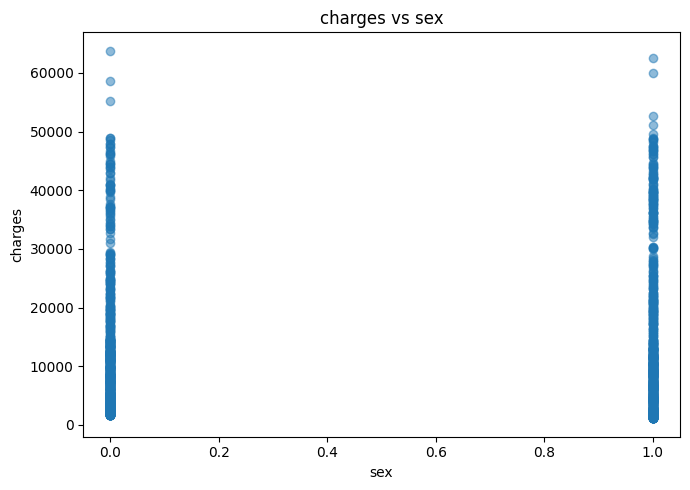

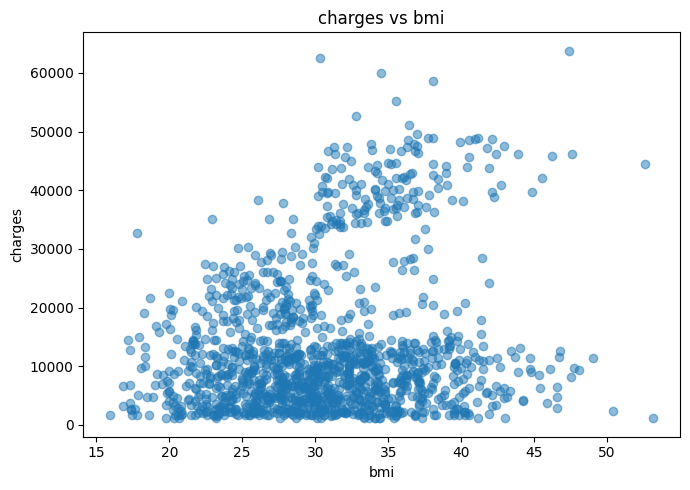

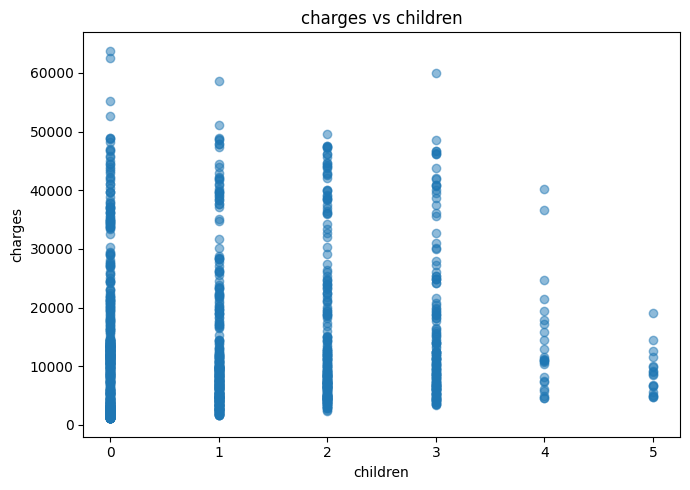

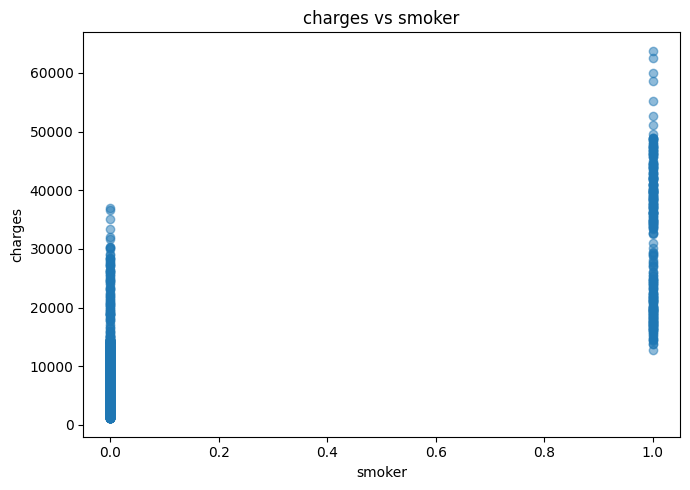

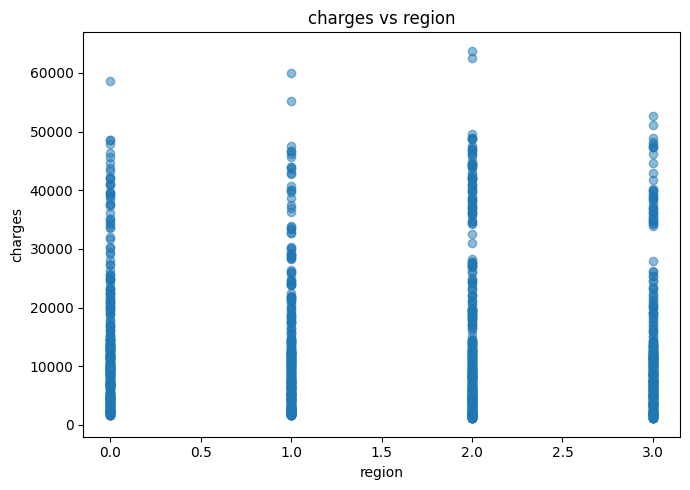

In [28]:
objetivo_vs_numericas(data_encoded, 'charges')

analizando el impacto de cada caracteristica en el data set encontramos tres relaciones interesantes, la primera es que a medida que aumenta la edad, el costo aumenta ligera pero constantemente, la segunda es que el costo es considerablemente mas alto para las personas que fuman y el tercero es que existe una ligera tendencia a un mayor costo a medida que aumenta el bmi.

In [29]:
def detect_outliers(df):
    numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_vars:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        print(f'{col}:')
        print(f'  IQR: {IQR}')
        print(f'  Límite inferior: {lower_bound}')
        print(f'  Límite superior: {upper_bound}')
        print(f'  Número de outliers: {len(outliers)}')
        print(f'  Outliers: \n{outliers}\n')

In [30]:
detect_outliers(data_encoded)

age:
  IQR: 24.0
  Límite inferior: -9.0
  Límite superior: 87.0
  Número de outliers: 0
  Outliers: 
Series([], Name: age, dtype: int64)

bmi:
  IQR: 8.3975
  Límite inferior: 13.7
  Límite superior: 47.290000000000006
  Número de outliers: 9
  Outliers: 
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

children:
  IQR: 2.0
  Límite inferior: -3.0
  Límite superior: 5.0
  Número de outliers: 0
  Outliers: 
Series([], Name: children, dtype: int64)

charges:
  IQR: 11899.625365
  Límite inferior: -13109.1508975
  Límite superior: 34489.350562499996
  Número de outliers: 139
  Outliers: 
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64



In [31]:
data_raw.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Axes: >

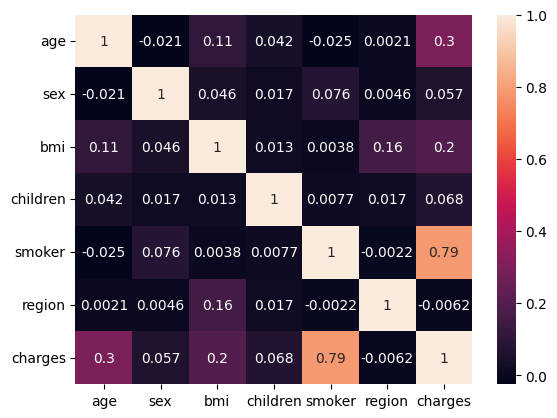

In [32]:
corr_values = data_encoded.corr()

sns.heatmap(corr_values, annot=True, cmap='rocket')

haciendo el analisis del heat map podemos confirmar las hipotesis anteriores, las tres variables que seran de mayor importancia pra el modelo seran edad, bmi y si la persona es o no fumadora, por otro lado la region y el sexo son variables cuya correlacion con la variable objetivo son practicamente nulas, por lo que las eliminaremos en una iteracion posterior de el modelo para observar el comportamiento de esto.

In [33]:
data_good = data_encoded.copy()

In [34]:
data_good_wo_sex_region = data_encoded[['age', 'bmi', 'children', 'smoker', 'charges']].copy()

Hacemos el split del data set 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= data_good.drop(['charges'], axis=1)
y= data_good['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


Hacemos el escalado y aplicamos el modelo (gracias por la correccion en mis entregas pasadas :))

In [36]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [40]:
y_pred2 = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

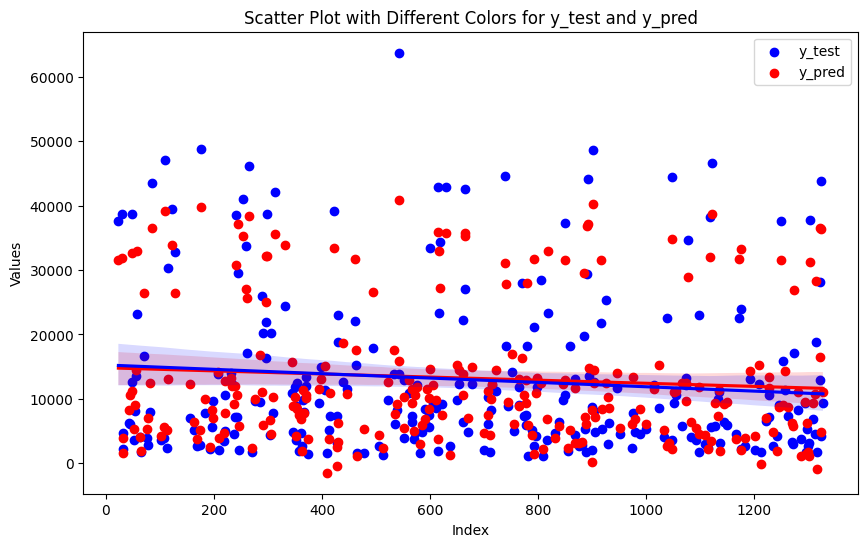

In [38]:
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred2})

plt.figure(figsize=(10, 6))


plt.scatter(results_df.index, results_df['y_test'], color='blue', label='y_test')


plt.scatter(results_df.index, results_df['y_pred'], color='red', label='y_pred')


sns.regplot(x=results_df.index, y='y_pred', data=results_df, scatter=False, color='red')


sns.regplot(x=results_df.index, y='y_test', data=results_df, scatter=False, color='blue')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot with Different Colors for y_test and y_pred')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")
#Analizamos el fit del modelo para ver que no este cayendo en overfitting o underfitting
print(f"Mean squared error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Coefficient of determination: {r2_score(y_train, y_pred_train)}")

Mean squared error: 33635210.431178436
Coefficient of determination: 0.7833463107364537
Mean squared error: 37280663.22256598
Coefficient of determination: 0.7417049283233981


Podemos ver que el modelo se ajusta en un 78.33% a los datos lo cual no es un mal ajuste, podriamos intentar otra forma de escalar los datos o revisitar el EDA para mejorar nuestros datos

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe_min_max = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', LinearRegression())
])

pipe_min_max.fit(X_train, y_train)
y_pred_min_max = pipe_min_max.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred_min_max)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_min_max)}")

Mean squared error: 33635210.431178406
Coefficient of determination: 0.7833463107364539


Ahora haremos el mismo proceso eliminando las dos variables que consideramos no agregan nada al data set

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= data_good_wo_sex_region.drop(['charges'], axis=1)
y= data_good_wo_sex_region['charges']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.2, random_state=42)


In [45]:
from sklearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

pipe1.fit(X_train1, y_train1)


Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [46]:
pred_1 = pipe1.predict(X_test1)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test1, pred_1)}")
print(f"Coefficient of determination: {r2_score(y_test1, pred_1)}")

Mean squared error: 33981653.95019775
Coefficient of determination: 0.7811147722517887


Observamos que la eliminacion de estas caracteristicas tiene un impacto negativo en la precision del modelo, por lo que las dejaremos con el data set completo. 

Dentro del scope de este proyecto no utilizamos la regalarizacion por lo que dejaremos el data set como se obtuvo inicialmente y guardaremos nuestros set de entrenamiento y testeo

In [51]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

In [52]:
data_train = pd.concat([X_train_df, y_train_df], axis=1)
data_test = pd.concat([X_test_df, y_test_df], axis=1)

In [53]:
train_path = rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Linear_regression-main\data\processed\data_train.csv"
test_path= rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Linear_regression-main\data\processed\data_test.csv"

data_train.to_csv(train_path, index=False)
data_test.to_csv(test_path, index=False)